# 线性回归
## 导入实验所需包

In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression #线性回归
from sklearn.linear_model import LogisticRegression #逻辑回归
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

## 定义模型

In [23]:
# 定义模型
def linear_model(X_train, X_test, y_train):
    # 线性回归
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    return y_pred


## 数据处理

In [24]:
# 全部特征
def dataProcess_full():
    # 加载 dataset/housing-data.csv
    df = pd.read_csv('dataset/housing-data.csv')
    # 数据处理
    # 平均值填充
    df = df.fillna(df.mean())
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    # 标准化
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    return X_train, X_test, y_train, y_test
# 部分特征
def dataProcess_part():
    # 加载 dataset/housing-data.csv
    df = pd.read_csv('dataset/housing-data.csv')
    # 数据处理
    # 平均值填充
    df = df.fillna(df.mean())
    X = df.iloc[:, [0, 1, 2, 3, 4, 5]]
    y = df.iloc[:, -1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    # 标准化
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    return X_train, X_test, y_train, y_test

## 主函数

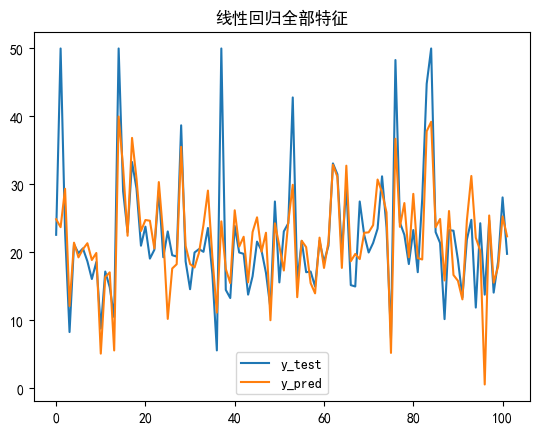

全部特征MSE: 33.448979997676496


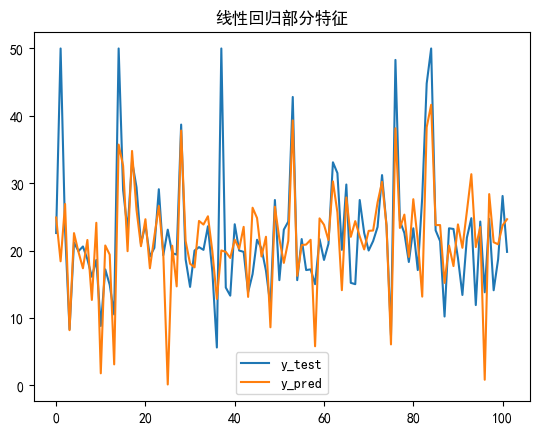

部分特征MSE: 47.24194082350583


In [25]:
# 设置显示中文字体
from pylab import mpl
mpl.rcParams["font.sans-serif"] = ["SimHei"]

# 全部特征
X_train, X_test, y_train, y_test = dataProcess_full()
# 将y_test转换为一维数组
y_test = np.array(y_test).reshape(-1, 1)
y_pred = linear_model(X_train, X_test, y_train)
# 可视化
from matplotlib import pyplot as plt
plt.title('线性回归全部特征')
plt.plot(y_test, label='y_test')
plt.plot(y_pred, label='y_pred')
plt.legend()
plt.show()
print('全部特征MSE:', mean_squared_error(y_test, y_pred))
# 部分特征
X_train, X_test, y_train, y_test = dataProcess_part()
y_test = np.array(y_test).reshape(-1, 1)
y_pred = linear_model(X_train, X_test, y_train)
# 可视化
plt.title('线性回归部分特征')
plt.plot(y_test, label='y_test')
plt.plot(y_pred, label='y_pred')
plt.legend()
plt.show()
print('部分特征MSE:', mean_squared_error(y_test, y_pred))

# 逻辑回归
## 导入实验所需包

In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression #线性回归
from sklearn.linear_model import LogisticRegression #逻辑回归
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

## 定义模型

In [27]:
def logistic_model(X_train, X_test, y_train):
    # 逻辑回归
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    return y_pred

## 数据处理

In [28]:
# 数据处理
# 全部特征
def dataProcess_full():
    path = 'dataset/breast-cancer-wisconsin.data'
    df = pd.read_csv(path, header=None)
    # 0填充'?'
    df = df.replace('?', 0)
    # 将所有数据转换为int类型
    df = df.astype(int)
    # 特征值
    X = df.iloc[:, 1:-1]
    # 目标值
    y = df.iloc[:, -1]
    # 划分数据集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    # 标准化
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    return X_train, X_test, y_train, y_test

# 部分特征
def dataProcess_part():
    path = 'dataset/breast-cancer-wisconsin.data'
    df = pd.read_csv(path, header=None)
    # 0填充'?'
    df = df.replace('?', 0)
    # 将所有数据转换为int类型
    df = df.astype(int)
    # 特征值
    X = df.iloc[:, [1, 2, 3, 4, 5]]
    # 目标值
    y = df.iloc[:, -1]
    # 划分数据集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    # 标准化
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    return X_train, X_test, y_train, y_test

## 主函数

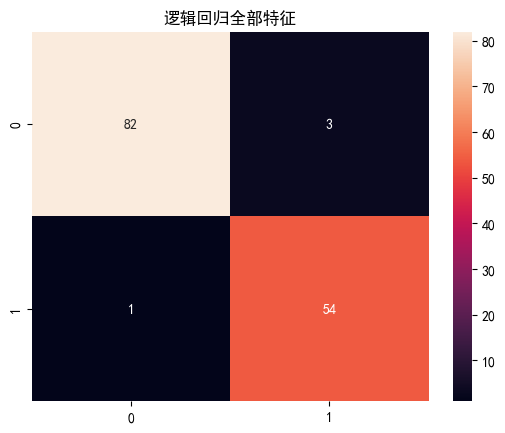

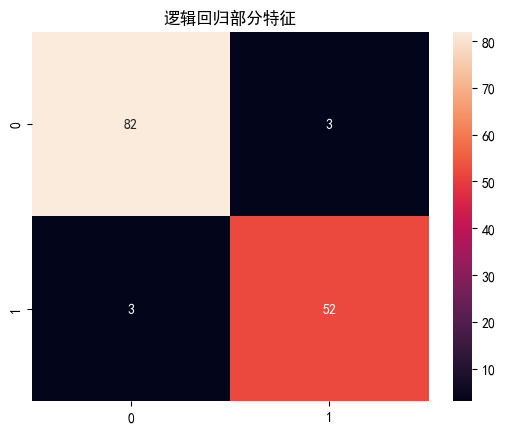

In [32]:
# 设置显示中文字体
from pylab import mpl
mpl.rcParams["font.sans-serif"] = ["SimHei"]
from matplotlib import pyplot as plt

# 全部特征
X_train, X_test, y_train, y_test = dataProcess_full()
y_test = np.array(y_test).reshape(-1, 1)
y_pred = logistic_model(X_train, X_test, y_train)
# 混淆矩阵
from seaborn import heatmap
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
heatmap(cm, annot=True, fmt='d')
plt.title('逻辑回归全部特征')
plt.show()

# 部分特征
X_train, X_test, y_train, y_test = dataProcess_part()
y_test = np.array(y_test).reshape(-1, 1)
y_pred = logistic_model(X_train, X_test, y_train)
# 混淆矩阵
cm = confusion_matrix(y_test, y_pred)
heatmap(cm, annot=True, fmt='d')
plt.title('逻辑回归部分特征')
plt.show()

